<a href="https://colab.research.google.com/github/KirthivasanPN-hash/algo_trading_strategy/blob/main/Shareprices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 48.6 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import sqlalchemy
import pandas as pd
import yfinance as yf
import datetime as dt
from pandas.tseries.offsets import MonthEnd

In [ ]:
wiki = 'https://en.wikipedia.org/wiki/'

In [ ]:
tickersSensex = pd.read_html(wiki+'BSE_SENSEX')[1]

In [ ]:
tickersSensex

,#,Exchange ticker,Symbol,Companies,Sector,Date Added
0,1,500820,ASIANPAINT.BO,Asian Paints,Paints,21 December 2015[4]
1,2,532215,AXISBANK.BO,Axis Bank,Banking - Private,NaN
2,3,532977,BAJAJ-AUTO.BO,Bajaj Auto,Automobile,NaN
3,4,500034,BAJFINANCE.BO,Bajaj Finance,Finance (NBFC),24 December 2018[5]
4,5,532978,BAJAJFINSV.BO,Bajaj Finserv,Finance (Investment),NaN
5,6,532454,BHARTIARTL.BO,Bharti Airtel,Telecommunications,NaN
6,7,500124,DRREDDY.BO,Dr Reddy's Laboratories,Pharmaceuticals,NaN
7,8,532281,HCLTECH.BO,HCL Technologies,IT Services & Consulting,NaN
8,9,500010,HDFC.BO,HDFC,Finance (Housing),NaN
9,10,500180,HDFCBANK.BO,HDFC Bank,Banking - Private,NaN


In [ ]:

def getdata(tickers):
  data = []
  for ticker in tickers:
	    data.append(yf.download(ticker).reset_index())
  return data


In [ ]:
india = getdata(tickersSensex)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
engine  = sqlalchemy.create_engine('sqlite:///India.db')

In [ ]:
india


[           Date         Open         High          Low        Close  \
 0    2000-01-03    23.437500    24.687500    23.437500    24.371876   
 1    2000-01-04    23.750000    24.468750    23.375000    24.375000   
 2    2000-01-05    24.062500    24.125000    23.456249    24.125000   
 3    2000-01-06    24.000000    24.062500    23.565624    23.750000   
 4    2000-01-07    23.437500    24.250000    23.437500    23.937500   
 ...         ...          ...          ...          ...          ...   
 5375 2022-07-11  2880.300049  2940.399902  2850.050049  2932.199951   
 5376 2022-07-12  2930.000000  2930.000000  2886.149902  2892.250000   
 5377 2022-07-13  2948.000000  2968.000000  2926.199951  2941.399902   
 5378 2022-07-14  2943.000000  2953.899902  2913.000000  2939.649902   
 5379 2022-07-15  2939.000000  2984.000000  2939.000000  2978.250000   
 
         Adj Close     Volume  
 0       17.633730   238128.0  
 1       17.635984   222840.0  
 2       17.455105   168648.0  
 3    

In [ ]:
len(india)

30

In [ ]:
def createengine(name):
    engine = sqlalchemy.create_engine('sqlite:///'+name)
    return engine

In [ ]:
indiaengine = createengine('India')

In [ ]:
def TOSQL(frames, symbols, engine):
    for frame,symbol in zip(frames,symbols):
        frame.to_sql(symbol, engine, index = False)
    print('Successfully imported data')
    

In [ ]:
TOSQL(india, tickersSensex, indiaengine)

Successfully imported data


In [ ]:
pd.read_sql(f'SELECT Date, "Adj Close" AS "{tickersSensex[0]}" FROM "ASIANPAINT.BO"', indiaengine)

,Date,ASIANPAINT.BO
0,2000-01-03 00:00:00.000000,17.633730
1,2000-01-04 00:00:00.000000,17.635984
2,2000-01-05 00:00:00.000000,17.455105
3,2000-01-06 00:00:00.000000,17.183786
4,2000-01-07 00:00:00.000000,17.319443
...,...,...
5375,2022-07-11 00:00:00.000000,2932.199951
5376,2022-07-12 00:00:00.000000,2892.250000
5377,2022-07-13 00:00:00.000000,2941.399902
5378,2022-07-14 00:00:00.000000,2939.649902


In [ ]:
df = pd.DataFrame()

In [ ]:
for name in tickersSensex:
    df = df.append(pd.read_sql(f'SELECT Date, "Adj Close" AS "{name}" FROM "{name}" WHERE Date > "2015-01-01"', indiaengine))                      

In [ ]:
df


,Date,ASIANPAINT.BO,AXISBANK.BO,BAJAJ-AUTO.BO,BAJFINANCE.BO,BAJAJFINSV.BO,BHARTIARTL.BO,DRREDDY.BO,HCLTECH.BO,HDFC.BO,...,NTPC.BO,ONGC.BO,POWERGRID.BO,RELIANCE.BO,SBIN.BO,SUNPHARMA.BO,TCS.BO,TECHM.BO,TITAN.BO,ULTRACEMCO.BO
0,2015-01-01 00:00:00.000000,711.768738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-02 00:00:00.000000,735.388367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-05 00:00:00.000000,735.056458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-06 00:00:00.000000,718.313965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-07 00:00:00.000000,732.590088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,2022-07-11 00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5848.750000
1858,2022-07-12 00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5775.350098
1859,2022-07-13 00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5798.950195
1860,2022-07-14 00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5732.049805


In [ ]:
df = df.groupby("Date").sum()

In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
df


,ASIANPAINT.BO,AXISBANK.BO,BAJAJ-AUTO.BO,BAJFINANCE.BO,BAJAJFINSV.BO,BHARTIARTL.BO,DRREDDY.BO,HCLTECH.BO,HDFC.BO,HDFCBANK.BO,...,NTPC.BO,ONGC.BO,POWERGRID.BO,RELIANCE.BO,SBIN.BO,SUNPHARMA.BO,TCS.BO,TECHM.BO,TITAN.BO,ULTRACEMCO.BO
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,711.768738,487.186401,1967.620728,341.345245,1284.077515,321.320740,3013.076416,344.119446,1009.548706,451.116486,...,85.416252,166.783722,109.459152,423.447876,295.882538,784.895630,1101.606323,548.026550,364.153137,2608.562744
2015-01-02,735.388367,499.076111,1967.139282,336.829468,1268.692871,323.002808,3018.470703,344.462860,1052.997070,457.589539,...,86.675903,169.304504,110.696182,422.279633,297.107727,786.323853,1111.397827,550.995972,367.082916,2685.547119
2015-01-05,735.056458,502.376007,1972.471191,337.936340,1258.237427,316.230225,2952.281982,339.365845,1039.382812,453.653534,...,86.375992,171.243561,111.015457,418.226593,294.610199,787.513855,1097.153442,541.918701,369.964600,2693.083984
2015-01-06,718.313965,484.614319,1956.596191,335.575562,1229.709229,313.751373,2875.960693,329.601013,990.677917,447.014587,...,83.676743,161.160431,108.621147,398.676605,282.688202,769.091064,1057.662354,536.307312,357.909424,2605.772949
2015-01-07,732.590088,484.274628,1962.088379,341.766449,1223.236694,314.459625,2855.367432,322.357788,988.521301,448.294922,...,85.506248,163.899338,109.938034,407.879456,283.065186,771.185669,1044.801147,533.654907,359.782562,2603.913086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-11,2932.199951,680.000000,3849.949951,5861.399902,11932.650391,660.299988,4472.750000,943.400024,2247.800049,1405.550049,...,144.350006,125.500000,217.000000,2423.199951,488.200012,856.799988,3105.053223,1007.500000,2158.750000,5848.750000
2022-07-12,2892.250000,675.450012,3848.750000,5873.450195,11860.000000,662.450012,4485.500000,928.049988,2226.350098,1391.650024,...,147.050003,124.050003,213.399994,2420.149902,484.799988,851.200012,3076.528564,997.700012,2130.850098,5775.350098
2022-07-13,2941.399902,679.900024,3858.350098,5877.850098,11769.049805,643.450012,4503.149902,917.750000,2167.399902,1357.650024,...,148.550003,124.449997,214.000000,2377.300049,486.649994,860.500000,3030.550049,990.049988,2110.649902,5798.950195


In [ ]:
mtlprices = df.resample('M').last()

In [ ]:
mtlprices


,ASIANPAINT.BO,AXISBANK.BO,BAJAJ-AUTO.BO,BAJFINANCE.BO,BAJAJFINSV.BO,BHARTIARTL.BO,DRREDDY.BO,HCLTECH.BO,HDFC.BO,HDFCBANK.BO,...,NTPC.BO,ONGC.BO,POWERGRID.BO,RELIANCE.BO,SBIN.BO,SUNPHARMA.BO,TCS.BO,TECHM.BO,TITAN.BO,ULTRACEMCO.BO
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-31,813.362000,571.384827,1915.705933,396.142365,1436.179199,329.996674,3036.906494,385.035217,1137.332153,510.250549,...,86.256027,170.370972,118.078598,436.465302,292.159851,872.058594,1074.703491,608.324341,413.574646,3073.307617
2015-02-28,765.505859,550.468689,1724.163208,402.871887,1413.077637,314.680908,3072.276123,436.092316,1210.523804,499.912781,...,95.481071,157.500443,125.181664,407.998596,282.688202,837.069580,1153.865723,599.394897,417.801147,3055.101318
2015-03-31,767.166016,543.917236,1617.447998,401.255646,1383.553467,348.720825,3271.874512,422.266815,1180.044678,485.046234,...,88.848351,150.641815,116.272034,393.240784,251.634460,973.264832,1103.314697,532.133179,376.544586,2814.115479
2015-04-30,723.673523,551.148071,1562.967773,392.752991,1421.890137,337.875916,3103.704834,380.801697,1052.388184,469.089081,...,90.627129,149.561600,113.949814,411.431793,254.508896,894.384949,1068.487427,526.934021,367.707245,2609.639648
2015-05-31,746.534241,568.036377,1856.094727,413.255310,1516.586304,376.519348,3314.374756,438.084229,1111.874146,498.442657,...,82.426674,162.008698,115.070885,423.070801,265.453247,919.472290,1130.842773,468.728668,362.616272,2913.612793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,3064.094727,759.494141,3520.267334,7232.753418,17046.013672,755.400024,4247.578613,1144.243896,2358.366455,1453.048950,...,134.949997,163.899994,216.850006,2633.949951,485.823181,914.799988,3704.006104,1499.300049,2527.211426,6602.149902
2022-04-30,3220.742188,727.592651,3592.118408,6647.983887,14903.084961,739.700012,4079.565918,1078.949951,2199.901367,1368.828613,...,153.600006,160.500000,227.600006,2790.800049,488.875610,928.700012,3517.062256,1256.550049,2450.532715,6629.000000
2022-05-31,2843.714600,684.358459,3723.098389,6056.787109,12909.352539,701.099976,4310.768555,1040.300049,2307.199951,1387.449951,...,156.149994,151.399994,233.000000,2633.899902,467.799988,860.450012,3355.940918,1180.849976,2209.784424,6083.100098


In [ ]:
formation = dt.datetime(2018,1,31)

In [ ]:
begin_measurement = formation - MonthEnd(12)

In [ ]:
end_measurement  = formation - MonthEnd(1)

In [ ]:
price_end = mtlprices.loc[end_measurement]

In [ ]:
price_end

ASIANPAINT.BO    1120.722778
AXISBANK.BO       560.848938
BAJAJ-AUTO.BO    2839.777832
BAJFINANCE.BO    1737.556152
BAJAJFINSV.BO    5229.078613
BHARTIARTL.BO     474.259918
DRREDDY.BO       2307.206543
HCLTECH.BO        409.665558
HDFC.BO          1593.149048
HDFCBANK.BO       908.478943
HINDUNILVR.BO    1270.375122
ICICIBANK.BO      306.742065
INDUSINDBK.BO    1620.847656
INFY.BO           462.978699
ITC.BO            218.655487
KOTAKBANK.BO     1007.541504
LT.BO            1161.955444
M&M.BO            716.144531
MARUTI.BO        9286.332031
NESTLEIND.BO     7254.088379
NTPC.BO           114.259270
ONGC.BO           156.269943
POWERGRID.BO      165.962524
RELIANCE.BO       904.149414
SBIN.BO           301.959045
SUNPHARMA.BO      549.635071
TCS.BO           1236.417603
TECHM.BO          446.534882
TITAN.BO          837.043518
ULTRACEMCO.BO    4263.933594
Name: 2017-12-31 00:00:00, dtype: float64

In [ ]:
price_12mbefore = mtlprices.loc[begin_measurement]

In [ ]:
ret_12 = price_end/price_12mbefore - 1

In [ ]:
ret_12

ASIANPAINT.BO    0.197490
AXISBANK.BO      0.218988
BAJAJ-AUTO.BO    0.194776
BAJFINANCE.BO    0.699807
BAJAJFINSV.BO    0.617278
BHARTIARTL.BO    0.525472
DRREDDY.BO      -0.194854
HCLTECH.BO       0.122266
HDFC.BO          0.266020
HDFCBANK.BO      0.465483
HINDUNILVR.BO    0.624710
ICICIBANK.BO     0.293866
INDUSINDBK.BO    0.322530
INFY.BO          0.151357
ITC.BO           0.034974
KOTAKBANK.BO     0.307012
LT.BO            0.337103
M&M.BO           0.223561
MARUTI.BO        0.666863
NESTLEIND.BO     0.359374
NTPC.BO          0.055150
ONGC.BO         -0.005548
POWERGRID.BO    -0.014775
RELIANCE.BO      0.778306
SBIN.BO          0.201154
SUNPHARMA.BO    -0.090112
TCS.BO           0.231311
TECHM.BO         0.141738
TITAN.BO         1.370783
ULTRACEMCO.BO    0.172624
dtype: float64

In [ ]:
winners = ret_12.nlargest(5)

In [ ]:
winners

TITAN.BO         1.370783
RELIANCE.BO      0.778306
BAJFINANCE.BO    0.699807
MARUTI.BO        0.666863
HINDUNILVR.BO    0.624710
dtype: float64

In [ ]:
winnerret = mtlprices.loc[formation+MonthEnd(1),winners.index]/mtlprices.loc[formation,winners.index] - 1

In [ ]:
winnerret

TITAN.BO        -0.061101
RELIANCE.BO     -0.009052
BAJFINANCE.BO   -0.021103
MARUTI.BO       -0.067373
HINDUNILVR.BO   -0.038915
dtype: float64

In [ ]:
loosers = ret_12.nsmallest(5)

In [ ]:
loosers

DRREDDY.BO     -0.194854
SUNPHARMA.BO   -0.090112
POWERGRID.BO   -0.014775
ONGC.BO        -0.005548
ITC.BO          0.034974
dtype: float64

In [ ]:
titan_df = yf.download('TITAN.BO', 
                      start='2018-01-01', 
                      end='2020-01-12', 
                      progress=False,
)
titan_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,850.0,861.750000,850.000000,853.599976,834.696594,24051
2018-01-02,855.0,856.799988,841.849976,845.400024,826.678223,103573
2018-01-03,861.0,869.650024,851.200012,856.349976,837.385681,128194
2018-01-04,855.0,895.000000,853.099976,891.700012,871.952881,187384
2018-01-05,892.5,912.450012,892.500000,909.049988,888.918579,210096


In [ ]:
titan_df = yf.download('TITAN.BO')

[*********************100%***********************]  1 of 1 completed


In [ ]:

def tickers_name(name):

  ticker = yf.Ticker('name')
  ticker_period = ticker.history(period="4y")
  ticker_period['Close'].plot(title= "{name} stock price")

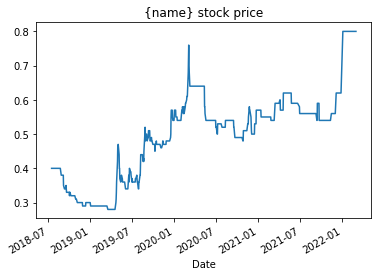

In [ ]:
tickers_name('AXISBANK.BO')

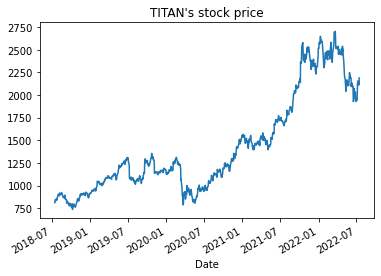

In [ ]:
ticker = yf.Ticker('TITAN.BO')
titan_df = ticker.history(period="4y")
titan_df['Close'].plot(title="TITAN's stock price")

In [ ]:
tcs_df = yf.download('TCS.BO', 
                      start='2018-01-01', 
                      end='2020-01-12', 
                      progress=False,
)
tcs_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,1344.900024,1346.250000,1321.425049,1327.324951,1215.470459,72202
2018-01-02,1321.474976,1338.724976,1311.349976,1316.875000,1205.901123,45568
2018-01-03,1317.000000,1332.025024,1315.074951,1317.599976,1206.564941,40080
2018-01-04,1330.000000,1330.000000,1320.199951,1324.900024,1213.249878,29218
2018-01-05,1325.500000,1347.000000,1325.500000,1342.224976,1229.115112,98284


In [ ]:
tcs_df = yf.download('TCS.BO')

[*********************100%***********************]  1 of 1 completed


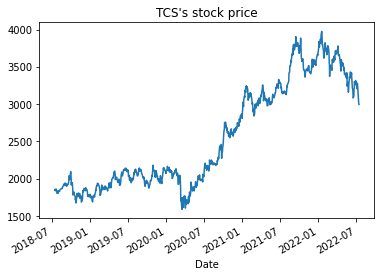

In [ ]:
ticker = yf.Ticker('TCS.BO')
titan_df = ticker.history(period="4y")
titan_df['Close'].plot(title="TCS's stock price")

In [ ]:
Momentumprofit = winnerret.mean()

In [ ]:
Momentumprofit

-0.03950878961817017

In [ ]:

def momentumprofit(formation,holdingperiod=1):
    begin_measurement = formation - MonthEnd(12)
    end_measurement  = formation - MonthEnd(1)
    price_end = mtlprices.loc[end_measurement]
    price_12mbefore = mtlprices.loc[begin_measurement]
    ret_12 = price_end/price_12mbefore - 1
    winners = ret_12.nlargest(3)
    winnerret = mtlprices.loc[formation+MonthEnd(1),winners.index]/mtlprices.loc[formation,winners.index] - 1
    Momentumprofit = winnerret.mean()
    return Momentumprofit




In [ ]:
momentumprofit(formation)

-0.030418573695692563

In [ ]:
mtlprices.index

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
      

In [ ]:
profits, dates, holding = [],[],[]

In [ ]:
for i in(1,3,6):
    for j in mtlprices.index[12:-i]:
        profits.append(momentumprofit(j, holdingperiod=i))
        dates.append(j+ MonthEnd(i))
        holding.append(i)

In [ ]:
frame = pd.DataFrame({'Momentumprofit': profits, 'holdingperiod':holding}, index=dates)

In [ ]:
frame.groupby('holdingperiod').mean()

,Momentumprofit
holdingperiod,
1,0.016053
3,0.017583
6,0.019731
